#Normalizador

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'laranja': [100,180,90,120,150,110],
    'suco': [15,20,10,30,25,20]
})
df

,laranja,suco
0,100,15
1,180,20
2,90,10
3,120,30
4,150,25
5,110,20


In [ ]:
from sklearn.preprocessing import MinMaxScaler
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [ ]:
normalizador = MinMaxScaler()
normalizador

MinMaxScaler()

In [ ]:
arr_laranja = df['laranja'].to_frame()
arr_laranja

,laranja
0,100
1,180
2,90
3,120
4,150
5,110


In [ ]:
normalizador.fit(arr_laranja)

MinMaxScaler()

In [ ]:
normalizador.clip, normalizador.data_min_, normalizador.data_max_, normalizador.feature_range

(False, array([90.]), array([180.]), (0, 1))

In [ ]:
normalizador.transform(arr_laranja)

array([[0.11111111],
       [1.        ],
       [0.        ],
       [0.33333333],
       [0.66666667],
       [0.22222222]])

In [ ]:
df['laranja_normalizada'] = normalizador.transform(arr_laranja)
df

,laranja,suco,laranja_normalizada
0,100,15,0.111111
1,180,20,1.000000
2,90,10,0.000000
3,120,30,0.333333
4,150,25,0.666667
5,110,20,0.222222


In [ ]:
arr_suco = df['suco'].to_frame()
arr_suco

,suco
0,15
1,20
2,10
3,30
4,25
5,20


In [ ]:
normalizador.fit(arr_suco)#treinamento

MinMaxScaler()

In [ ]:
normalizador.clip, normalizador.data_min_, normalizador.data_max_, normalizador.feature_range

(False, array([10.]), array([30.]), (0, 1))

In [ ]:
normalizador.transform(arr_suco)

array([[0.25],
       [0.5 ],
       [0.  ],
       [1.  ],
       [0.75],
       [0.5 ]])

In [ ]:
df['suco_normalizado'] = normalizador.transform(arr_suco)
df

,laranja,suco,laranja_normalizada,suco_normalizado
0,100,15,0.111111,0.25
1,180,20,1.000000,0.50
2,90,10,0.000000,0.00
3,120,30,0.333333,1.00
4,150,25,0.666667,0.75
5,110,20,0.222222,0.50


In [ ]:
normalizador = MinMaxScaler(clip=True)
normalizador.fit(df['laranja'].to_frame())

MinMaxScaler(clip=True)

In [ ]:
normalizador.transform([[360], [225], [180], [90], [45], [15]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.]])

#Padronizador

In [ ]:
from sklearn.preprocessing import StandardScaler
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing._data:

class StandardScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance.
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual feat

In [ ]:
padronizador = StandardScaler()
padronizador

StandardScaler()

In [ ]:
df['laranja'].mean(), df['laranja'].std()

(125.0, 33.91164991562634)

In [ ]:
df['laranja'].describe()

count      6.00000
mean     125.00000
std       33.91165
min       90.00000
25%      102.50000
50%      115.00000
75%      142.50000
max      180.00000
Name: laranja, dtype: float64

In [ ]:
padronizador.fit(df['laranja'].to_frame()) #treinamento

StandardScaler()

In [ ]:
dir(padronizador)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_reset',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'copy',
 'feature_names_in_',
 'fit',
 'fit_transform',
 'get_feature_names_out',
 'get_params',
 'inverse_transform',
 'mean_',
 'n_features_in_',
 'n_samples_seen_',
 'partial_fit',
 'scale_',
 'set_output',
 'set_params',
 'transform',
 'var_',
 'with_mean',
 'with_std']

In [ ]:
padronizador.mean_, padronizador.scale_, padronizador.var_

(array([125.]), array([30.95695937]), array([958.33333333]))

In [ ]:
padronizador.transform(df['laranja'].to_frame())

array([[-0.80757285],
       [ 1.77666028],
       [-1.13060199],
       [-0.16151457],
       [ 0.80757285],
       [-0.48454371]])

In [ ]:
df['laranja_padronizada'] = padronizador.transform(df['laranja'].to_frame())
df

,laranja,suco,laranja_normalizada,suco_normalizado,laranja_padronizada
0,100,15,0.111111,0.25,-0.807573
1,180,20,1.000000,0.50,1.776660
2,90,10,0.000000,0.00,-1.130602
3,120,30,0.333333,1.00,-0.161515
4,150,25,0.666667,0.75,0.807573
5,110,20,0.222222,0.50,-0.484544


In [ ]:
df['suco'].mean(), df['suco'].std()

(20.0, 7.0710678118654755)

In [ ]:
padronizador.fit(df['suco'].to_frame())

StandardScaler()

In [ ]:
padronizador.mean_, padronizador.var_, padronizador.scale_

(array([20.]), array([41.66666667]), array([6.45497224]))

In [ ]:
padronizador.transform(df['suco'].to_frame())

array([[-0.77459667],
       [ 0.        ],
       [-1.54919334],
       [ 1.54919334],
       [ 0.77459667],
       [ 0.        ]])

In [ ]:
df['suco_padronizado'] = padronizador.transform(df['suco'].to_frame())
df

,laranja,suco,laranja_normalizada,suco_normalizado,laranja_padronizada,suco_padronizado
0,100,15,0.111111,0.25,-0.807573,-0.774597
1,180,20,1.000000,0.50,1.776660,0.000000
2,90,10,0.000000,0.00,-1.130602,-1.549193
3,120,30,0.333333,1.00,-0.161515,1.549193
4,150,25,0.666667,0.75,0.807573,0.774597
5,110,20,0.222222,0.50,-0.484544,0.000000


In [ ]:
padronizador.fit(df['laranja'].to_frame())
padronizador.transform([[500], [45]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[12.1135928 ],
       [-2.58423313]])

In [ ]:
outlier = df['laranja'].copy()
outlier

0    100
1    180
2     90
3    120
4    150
5    110
Name: laranja, dtype: int64

In [ ]:
outlier[5] = 500

In [ ]:
padronizador.mean_, padronizador.scale_

(array([125.]), array([30.95695937]))

In [ ]:
padronizador.fit(outlier.to_frame())

StandardScaler()

In [ ]:
padronizador.mean_, padronizador.scale_

(array([190.]), array([141.89197769]))

# Outliers


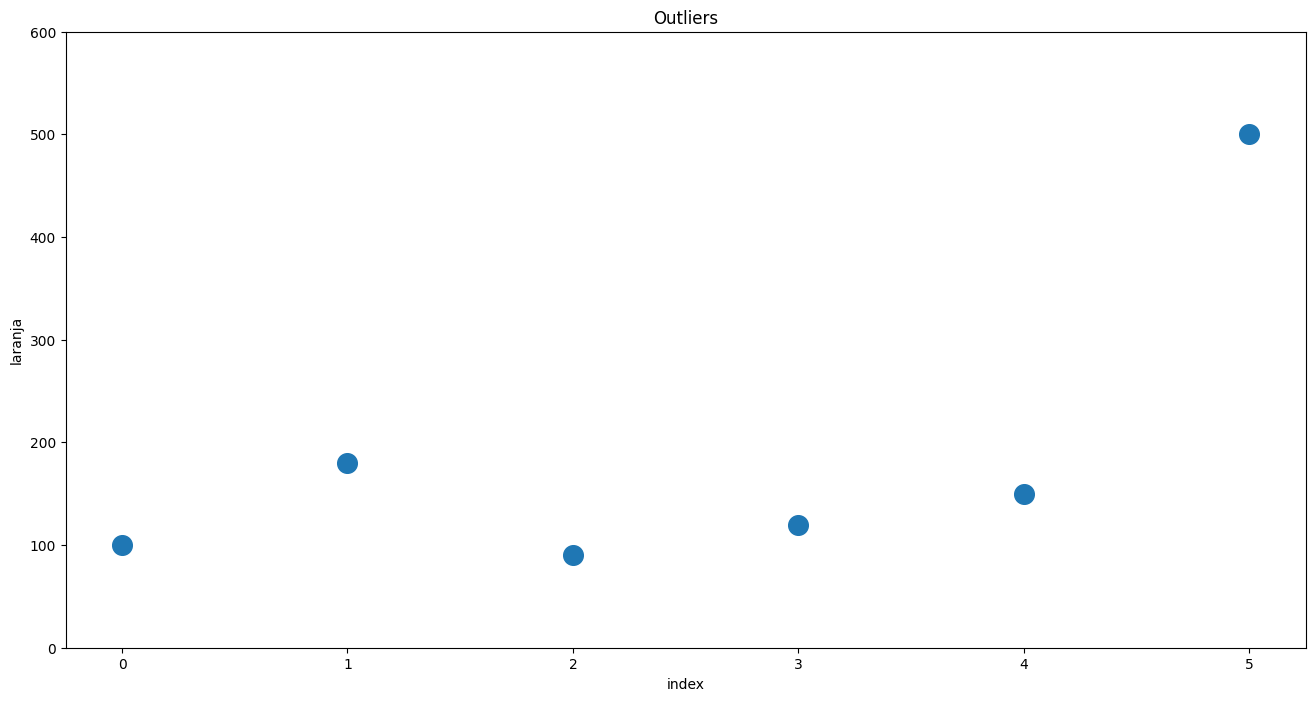

In [ ]:
outlier.reset_index().plot(
    kind='scatter',
    x='index',
    y='laranja',
    s=200,
    figsize=(16,8),
    title ='Outliers',
    ylim=[0,600]
);

In [ ]:
outlier.describe()

count      6.000000
mean     190.000000
std      155.434874
min       90.000000
25%      105.000000
50%      135.000000
75%      172.500000
max      500.000000
Name: laranja, dtype: float64

In [ ]:
df['laranja'].describe()

count      6.00000
mean     125.00000
std       33.91165
min       90.00000
25%      102.50000
50%      115.00000
75%      142.50000
max      180.00000
Name: laranja, dtype: float64

In [ ]:
df['laranja'].mean(), outlier.mean(), outlier.median()

(125.0, 190.0, 135.0)

In [ ]:
outlier.quantile(.75), outlier.quantile (.50), outlier.quantile(.25)

(172.5, 135.0, 105.0)

In [ ]:
Q1 = outlier.quantile(.25)
Q2 = outlier.quantile (.50) #outlier.median()
Q3 = outlier.quantile(.75)
IQR = Q3-Q1
IQR

67.5

In [ ]:
df['laranja'].std(), outlier.std(), df['laranja'].quantile(.75)-df['laranja'].quantile(.25), IQR

(33.91164991562634, 155.4348738218036, 40.0, 67.5)

In [ ]:
help(outlier.to_frame().boxplot)

Help on method boxplot_frame in module pandas.plotting._core:

boxplot_frame(column=None, by=None, ax=None, fontsize=None, rot: 'int' = 0, grid: 'bool' = True, figsize=None, layout=None, return_type=None, backend=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Make a box plot from DataFrame columns.
    
    Make a box-and-whisker plot from DataFrame columns, optionally grouped
    by some other columns. A box plot is a method for graphically depicting
    groups of numerical data through their quartiles.
    The box extends from the Q1 to Q3 quartile values of the data,
    with a line at the median (Q2). The whiskers extend from the edges
    of box to show the range of the data. By default, they extend no more than
    `1.5 * IQR (IQR = Q3 - Q1)` from the edges of the box, ending at the farthest
    data point within that interval. Outliers are plotted as separate dots.
    
    For further details see
    Wikipedia's entry for `boxplot <https://en.wikipedia.org/w

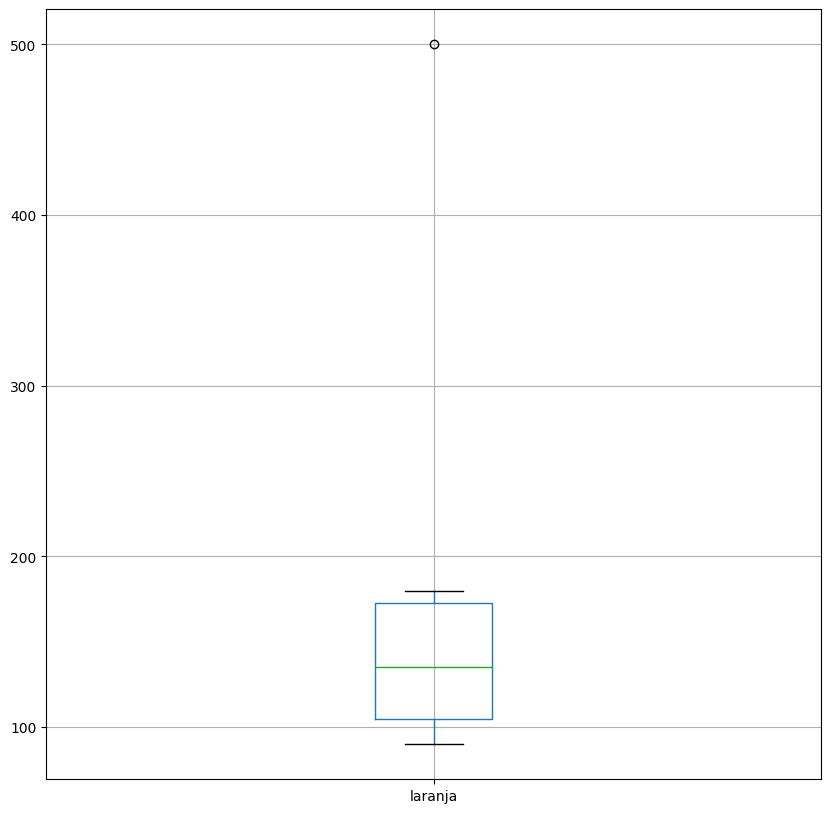

In [ ]:
outlier.to_frame().boxplot(figsize=[10,10]);

In [ ]:
outlier.describe()

count      6.000000
mean     190.000000
std      155.434874
min       90.000000
25%      105.000000
50%      135.000000
75%      172.500000
max      500.000000
Name: laranja, dtype: float64

# RobustScaler

In [ ]:
outlier

0    100
1    180
2     90
3    120
4    150
5    500
Name: laranja, dtype: int64

In [ ]:
from sklearn.preprocessing import RobustScaler
help(RobustScaler)

Help on class RobustScaler in module sklearn.preprocessing._data:

class RobustScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  RobustScaler(*, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)
 |  
 |  Scale features using statistics that are robust to outliers.
 |  
 |  This Scaler removes the median and scales the data according to
 |  the quantile range (defaults to IQR: Interquartile Range).
 |  The IQR is the range between the 1st quartile (25th quantile)
 |  and the 3rd quartile (75th quantile).
 |  
 |  Centering and scaling happen independently on each feature by
 |  computing the relevant statistics on the samples in the training
 |  set. Median and interquartile range are then stored to be used on
 |  later data using the :meth:`transform` method.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators. Typically this is do

In [ ]:
robusto = RobustScaler()
robusto

RobustScaler()

In [ ]:
robusto.fit(outlier.to_frame())

RobustScaler()

In [ ]:
robusto.transform(outlier.to_frame())

array([[-0.51851852],
       [ 0.66666667],
       [-0.66666667],
       [-0.22222222],
       [ 0.22222222],
       [ 5.40740741]])

In [ ]:
robusto.fit(df['laranja'].to_frame())
robusto.transform(df['laranja'].to_frame())

array([[-0.375],
       [ 1.625],
       [-0.625],
       [ 0.125],
       [ 0.875],
       [-0.125]])

In [ ]:
pd.concat([
    df['laranja'],
    outlier
], axis=1)

,laranja,laranja
0,100,100
1,180,180
2,90,90
3,120,120
4,150,150
5,110,500


In [ ]:
robusto.center_, robusto.quantile_range, robusto.scale_

(array([115.]), (25.0, 75.0), array([40.]))

In [ ]:
(500-Q2)/IQR

5.407407407407407

# Funcion Transformer

In [ ]:
df['suco']

0    15
1    20
2    10
3    30
4    25
5    20
Name: suco, dtype: int64

In [ ]:
from sklearn.preprocessing import FunctionTransformer
help(FunctionTransformer)

Help on class FunctionTransformer in module sklearn.preprocessing._function_transformer:

class FunctionTransformer(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  FunctionTransformer(func=None, inverse_func=None, *, validate=False, accept_sparse=False, check_inverse=True, feature_names_out=None, kw_args=None, inv_kw_args=None)
 |  
 |  Constructs a transformer from an arbitrary callable.
 |  
 |  A FunctionTransformer forwards its X (and optionally y) arguments to a
 |  user-defined function or function object and returns the result of this
 |  function. This is useful for stateless transformations such as taking the
 |  log of frequencies, doing custom scaling, etc.
 |  
 |  Note: If a lambda is used as the function, then the resulting
 |  transformer will not be pickleable.
 |  
 |  .. versionadded:: 0.17
 |  
 |  Read more in the :ref:`User Guide <function_transformer>`.
 |  
 |  Parameters
 |  ----------
 |  func : callable, default=None
 |      The callable to use 

In [ ]:
def suco_laranja(suco):
  return suco * 10

suco_laranja(15)

150

In [ ]:
def laranja_suco(laranja):
  return laranja/10

laranja_suco(150)

15.0

In [ ]:
to_laranja = FunctionTransformer(
    func=suco_laranja,
    inverse_func=laranja_suco,
    #validate=True
)
to_laranja

FunctionTransformer(func=<function suco_laranja at 0x7fd737ed5630>,
                    inverse_func=<function laranja_suco at 0x7fd737ed4a60>)

In [ ]:
to_laranja.fit(df['suco'].to_frame())

FunctionTransformer(func=<function suco_laranja at 0x7fd737ed5630>,
                    inverse_func=<function laranja_suco at 0x7fd737ed4a60>)

In [ ]:
resultado = to_laranja.transform(df['suco'].to_frame())
resultado

,suco
0,150
1,200
2,100
3,300
4,250
5,200


In [ ]:
to_laranja.inverse_transform(resultado)

,suco
0,15.0
1,20.0
2,10.0
3,30.0
4,25.0
5,20.0


# Column Transformer

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'laranja': [100,180,90,120,150,110],
    'suco': [15,20,10,30,25,20],
    'outliers': [100,180,90,120,150,500]
})
df

,laranja,suco,outliers
0,100,15,100
1,180,20,180
2,90,10,90
3,120,30,120
4,150,25,150
5,110,20,500


In [ ]:
df

,laranja,suco,outliers
0,100,15,100
1,180,20,180
2,90,10,90
3,120,30,120
4,150,25,150
5,110,20,500


In [ ]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

In [ ]:
to_laranja

FunctionTransformer(func=<function suco_laranja at 0x7fd737ed5630>,
                    inverse_func=<function laranja_suco at 0x7fd737ed4a60>)

In [ ]:
padronizador

StandardScaler()

In [ ]:
robusto

RobustScaler()

In [ ]:
help(ColumnTransformer)

Help on class ColumnTransformer in module sklearn.compose._column_transformer:

class ColumnTransformer(sklearn.base.TransformerMixin, sklearn.utils.metaestimators._BaseComposition)
 |  ColumnTransformer(transformers, *, remainder='drop', sparse_threshold=0.3, n_jobs=None, transformer_weights=None, verbose=False, verbose_feature_names_out=True)
 |  
 |  Applies transformers to columns of an array or pandas DataFrame.
 |  
 |  This estimator allows different columns or column subsets of the input
 |  to be transformed separately and the features generated by each transformer
 |  will be concatenated to form a single feature space.
 |  This is useful for heterogeneous or columnar data, to combine several
 |  feature extraction mechanisms or transformations into a single transformer.
 |  
 |  Read more in the :ref:`User Guide <column_transformer>`.
 |  
 |  .. versionadded:: 0.20
 |  
 |  Parameters
 |  ----------
 |  transformers : list of tuples
 |      List of (name, transformer, colum

In [ ]:
transformador = ColumnTransformer([
    ('Suco para laranja', to_laranja, ['suco']),
    ('padronizador', padronizador, ['laranja']),
    ('padronizador robusto', robusto, ['outliers'])
])
transformador

ColumnTransformer(transformers=[('Suco para laranja',
                                 FunctionTransformer(func=<function suco_laranja at 0x7fd737ed5630>,
                                                     inverse_func=<function laranja_suco at 0x7fd737ed4a60>),
                                 ['suco']),
                                ('padronizador', StandardScaler(), ['laranja']),
                                ('padronizador robusto', RobustScaler(),
                                 ['outliers'])])

In [ ]:
transformador.fit(df)

ColumnTransformer(transformers=[('Suco para laranja',
                                 FunctionTransformer(func=<function suco_laranja at 0x7fd737ed5630>,
                                                     inverse_func=<function laranja_suco at 0x7fd737ed4a60>),
                                 ['suco']),
                                ('padronizador', StandardScaler(), ['laranja']),
                                ('padronizador robusto', RobustScaler(),
                                 ['outliers'])])

In [ ]:
df

,laranja,suco,outliers
0,100,15,100
1,180,20,180
2,90,10,90
3,120,30,120
4,150,25,150
5,110,20,500


In [ ]:
resultado = transformador.transform(df)
resultado

array([[ 1.50000000e+02, -8.07572853e-01, -5.18518519e-01],
       [ 2.00000000e+02,  1.77666028e+00,  6.66666667e-01],
       [ 1.00000000e+02, -1.13060199e+00, -6.66666667e-01],
       [ 3.00000000e+02, -1.61514571e-01, -2.22222222e-01],
       [ 2.50000000e+02,  8.07572853e-01,  2.22222222e-01],
       [ 2.00000000e+02, -4.84543712e-01,  5.40740741e+00]])

In [ ]:
pd.DataFrame(resultado, columns=df.columns)

,laranja,suco,outliers
0,150.0,-0.807573,-0.518519
1,200.0,1.776660,0.666667
2,100.0,-1.130602,-0.666667
3,300.0,-0.161515,-0.222222
4,250.0,0.807573,0.222222
5,200.0,-0.484544,5.407407


In [ ]:
df.columns

Index(['laranja', 'suco', 'outliers'], dtype='object')

In [ ]:
df_limpo = pd.DataFrame(resultado, columns=['suco', 'laranja', 'outliers'])
df_limpo

,suco,laranja,outliers
0,150.0,-0.807573,-0.518519
1,200.0,1.776660,0.666667
2,100.0,-1.130602,-0.666667
3,300.0,-0.161515,-0.222222
4,250.0,0.807573,0.222222
5,200.0,-0.484544,5.407407
